# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


## Model Choice

We chose a simple convolutional model with 3*3 kernals and MaxPooling since we talked in the lecture about them doing well on image related tasks. The classification is done by 2 dense layers at the end of the model.


## Feature Selection

Our features are 256*256 RGB images of the different wheat diseases.


## Implementation





In [71]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [72]:
# Initialize the baseline model
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model.summary()


f:\Anaconda\envs\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,466,762 (28.48 MB)

 Trainable params: 7,466,762 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

### Create the Datasets

In [73]:
# Define the paths to the folders containing the image data
train_data_dir = '../Dataset/cleaned_scaled_split/train/'
validation_data_dir = '../Dataset/cleaned_scaled_split/val/'
test_data_dir = '../Dataset/cleaned_scaled_split/test/'

# Set the parameters for image data generation
batch_size = 64
img_height = 256
img_width = 256
# Load the training data from the folders
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256))


# Load the validation data from the folders
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256))

# Load the validation data from the folders
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=2,
    image_size=(256, 256))

Found 2167 files belonging to 10 classes.
Found 283 files belonging to 10 classes.
Found 289 files belonging to 10 classes.


In [74]:

# # Get an element from the train dataset
# element = next(iter(train_ds.take(1)))

# # Access the input and target tensors
# input_tensor, target_tensor = element

# # Print the shapes of the tensors
# print("Input tensor shape:", input_tensor.shape)
# print("Target tensor shape:", target_tensor.shape)



In [75]:
# # # Train the network using the loaded data
# import time
# name = "training_" + time.strftime("%Y%m%d-%H%M")
# csv_logger =  tf.keras.callbacks.CSVLogger(name+'.csv', append=True, separator=';')
model.fit(train_ds, epochs=15, validation_data=(validation_ds),shuffle=True)
# print("Training complete!")

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.1259 - loss: 122.5093 - val_accuracy: 0.2473 - val_loss: 2.2313
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.2852 - loss: 2.0773 - val_accuracy: 0.3286 - val_loss: 2.0204
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5216 - loss: 1.4318 - val_accuracy: 0.3781 - val_loss: 2.2151
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7355 - loss: 0.8903 - val_accuracy: 0.3958 - val_loss: 2.5660
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8491 - loss: 0.5381 - val_accuracy: 0.4064 - val_loss: 2.6876
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9135 - loss: 0.3533 - val_accuracy: 0.4594 - val_loss: 3.7542
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9418 - loss: 0.2884 - val_accuracy: 0.4664 - val_loss: 3.6198
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9613 - loss: 0.1842 - val_accuracy: 0.4664 - val_los

In [76]:
# Save the final model parameters to a file
model.save('baseline_model_15_epoch_tvt_split_5.keras')

In [77]:
import os

train_dir = '../Dataset/train_cleaned_scaled/train/'

datadirs = os.listdir(train_dir)
print(datadirs)

['Aphid', 'Black Rust', 'Brown Rust', 'Healthy', 'Mildew', 'Septoria', 'Smut', 'Stem fly', 'Tan spot', 'Yellow Rust']


In [78]:
# import matplotlib.pyplot as plt

# train_acc = model.history.history['accuracy']
# plt.figure(figsize=(8, 4), dpi=150)
# plt.plot(train_acc)
# plt.grid()
# plt.xticks(range(0, 10))
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

## Evaluation

We evalute our model on the accuracy per class and also take a look at the confusion matrix to see how the model does specifically on the different classes.



In [83]:
try:
    predictions = model.summary()
except NameError:
    model = tf.keras.models.load_model('baseline_model_15_epoch_tvt_split_4.keras')	
class_correct = [0]*10
class_counters = [0]*10
predicted = np.array([])
true_labels = np.array([])
for batch in test_ds:
    predictions = model.predict(batch[0])
    y_pred_classes = np.argmax(predictions, axis=1)
    predicted = np.concatenate((predicted,y_pred_classes))
    true_labels = np.concatenate((true_labels,batch[1].numpy()))

for i in range(10):
    class_correct[i] = np.sum(predicted[true_labels==i] == i)
    class_counters[i] = np.sum(true_labels==i)
conf_mat = confusion_matrix(true_labels, predicted,normalize='true')
calss_accuracy = [class_correct[i]/class_counters[i] for i in range(10)]



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,400,288 (85.45 MB)

 Trainable params: 7,466,762 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,933,526 (56.97 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [84]:
calss_accuracy

[0.41935483870967744,
 0.40625,
 0.16,
 0.37142857142857144,
 0.3076923076923077,
 0.48,
 0.6,
 0.6086956521739131,
 0.2857142857142857,
 0.28]

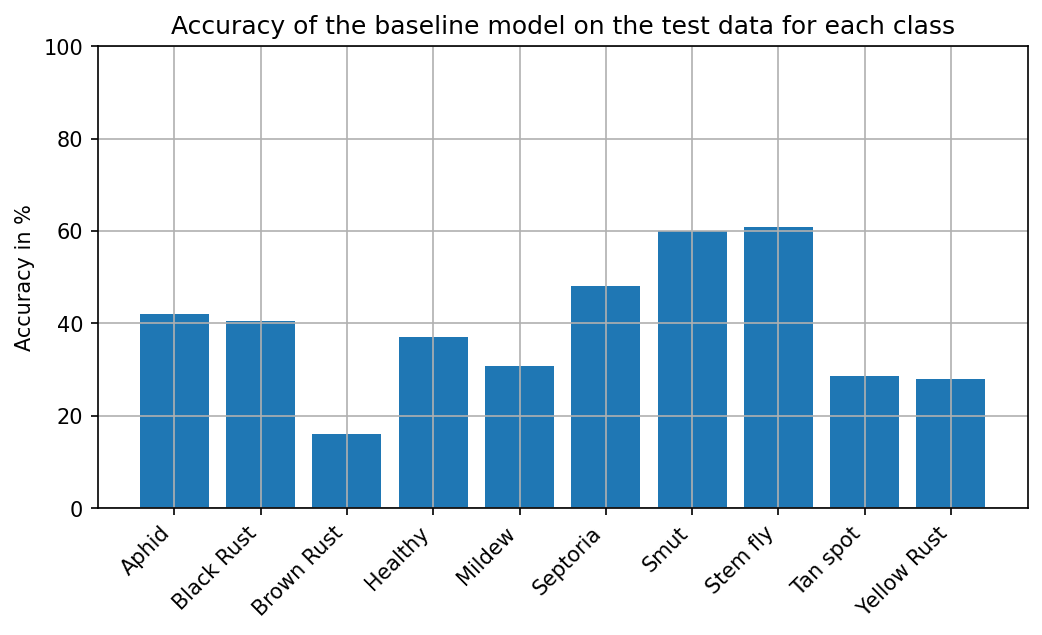

In [85]:
import matplotlib.pyplot as plt

# Define the class labels
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Plot the bar chart
plt.figure(figsize=(8, 4), dpi=150)
plt.grid()
plt.bar(class_labels, np.asarray(calss_accuracy)*100)

# Add labels and title
#plt.xlabel('Class')
plt.ylabel('Accuracy in %')
plt.title('Accuracy of the baseline model on the test data for each class')

plt.ylim(0, 100)
plt.xticks(class_labels,datadirs, rotation=45, ha='right')
# Show the plot
plt.show()

[Text(0, 0, 'Aphid'),
 Text(0, 1, 'Black Rust'),
 Text(0, 2, 'Brown Rust'),
 Text(0, 3, 'Healthy'),
 Text(0, 4, 'Mildew'),
 Text(0, 5, 'Septoria'),
 Text(0, 6, 'Smut'),
 Text(0, 7, 'Stem fly'),
 Text(0, 8, 'Tan spot'),
 Text(0, 9, 'Yellow Rust')]

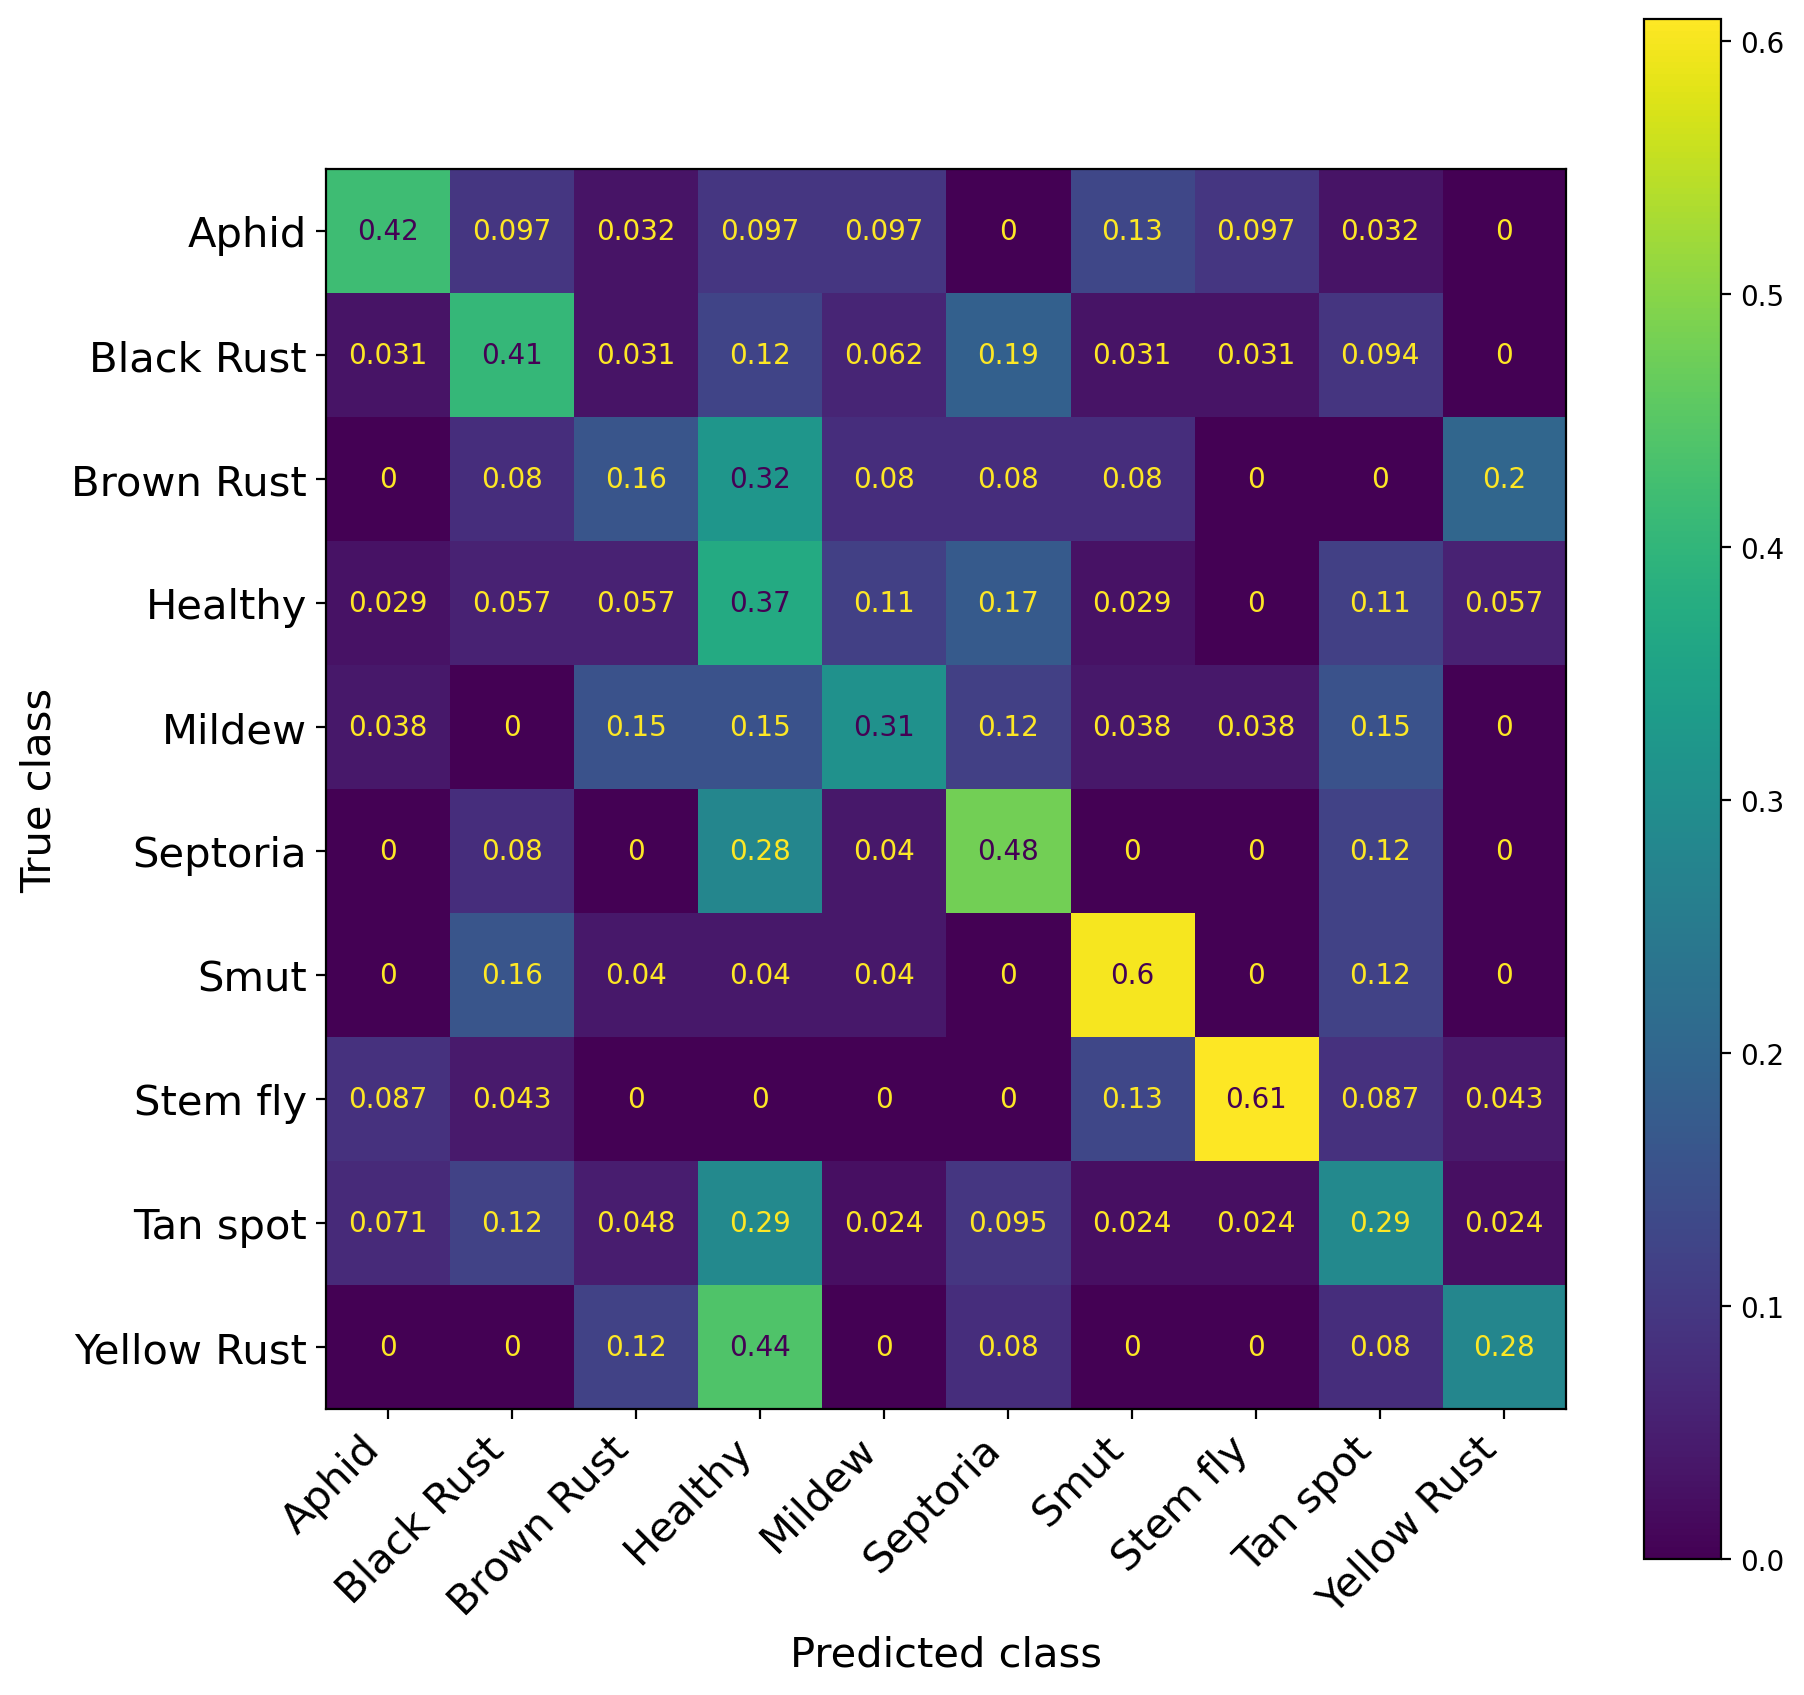

In [90]:
disp = ConfusionMatrixDisplay(conf_mat,display_labels=datadirs)
disp.plot()
disp.figure_.set_size_inches(10,10)
disp.figure_.set_dpi(200)
disp.ax_.set_xlabel('Predicted class',fontsize=15)
disp.ax_.set_ylabel('True class',fontsize=15)
disp.ax_.set_xticklabels(datadirs,rotation=45, ha='right',fontsize=15)
disp.ax_.set_yticklabels(datadirs, ha='right',fontsize=15)